In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/Users/nomer/codeup-data-science/Functions')
import function

import wrangle
import env
import explore
import feature_engineering
import regression_function

In [2]:
df = wrangle.clean_zillow(wrangle.wrangle_get_zillow())

this file exists, reading from csv file


In [3]:
# looking at the df
df.head()

,bedroom,bathroom,square_ft,property_value,yr_built,tax,county
4,4.0,2.0,3633.0,296425.0,2005,6941.39,LA
6,3.0,4.0,1620.0,847770.0,2011,10244.94,LA
7,3.0,2.0,2077.0,646760.0,1926,7924.68,LA
11,0.0,0.0,1200.0,5328.0,1972,91.60,LA
14,0.0,0.0,171.0,6920.0,1973,255.17,LA


In [5]:
# using function to output df information
function.check_columns(df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
0,bedroom,19,"[4.0, 3.0, 0.0, 5.0, 2.0, 1.0, 6.0, 7.0, 8.0, 9.0, 25.0, 10.0, 11.0, 14.0, 15.0, 13.0,...",0,0.0,float64
1,bathroom,38,"[2.0, 4.0, 0.0, 1.0, 2.5, 3.5, 3.0, 5.5, 4.5, 5.0, 1.5, 7.5, 6.0, 10.0, 8.0, 7.0, 11.0...",0,0.0,float64
2,square_ft,10557,"[3633.0, 1620.0, 2077.0, 1200.0, 171.0, 203.0, 1244.0, 1300.0, 1222.0, 4144.0, 1821.0,...",0,0.0,float64
3,property_value,588178,"[296425.0, 847770.0, 646760.0, 5328.0, 6920.0, 14166.0, 169471.0, 233266.0, 290492.0, ...",0,0.0,float64
4,yr_built,153,"[2005, 2011, 1926, 1972, 1973, 1960, 1950, 1951, 2016, 2013, 2014, 2015, 2012, 1944, 1...",0,0.0,int64
5,tax,915868,"[6941.39, 10244.94, 7924.68, 91.6, 255.17, 163.79, 2532.88, 3110.99, 3870.25, 14820.1,...",0,0.0,float64
6,county,3,"[LA, Orange, Ventura]",0,0.0,object


In [6]:
def one_hot_encoder(df):
    '''
    This function will encode object_type variables changed to number_type variables
    ready for ML modeling

    Input: df
    Output: df_encoded
    '''
    cat_cols = []
    for col in df.columns:
        if df[col].dtype == 'object':
            cat_cols.append(col)

    # create an instance of the OneHotEncoder
    encoder = OneHotEncoder(sparse=False)
   
    # fit the encoder to the categorical variables into one_hot_encoder features
    encoder.fit(df[cat_cols])
    
    # transform the categorical variables from the one_hot_encoder features  
    # and rename variable
    encoded = encoder.transform(df[cat_cols])
    
    # create new df with one_hot_encoder from categorical features
    one_hot_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

    # concatenate the original df with the one_hot_encoded df
    df = pd.concat([df, one_hot_df], axis=1).drop(columns=cat_cols)
    
    return df

In [7]:
# using function to split df into train, validate, and test datasets
train, validate, test = wrangle.wrangle_zillow(df)

In [8]:
# looking at the shape of train, validate, test datsets
train.shape, validate.shape, test.shape

((1284141, 7), (428047, 7), (428047, 7))

In [9]:
# using a function to encode train, validate, test datasets
train_encoded, validate_encoded, test_encoded = function.preprocess(train, validate, test)

In [11]:
# looking at the train dataset after encoding
train_encoded.head()

,bedroom,bathroom,square_ft,property_value,yr_built,tax,county_Orange,county_Ventura
462820,5.0,4.0,3011.0,710674.0,2005,7561.14,0,1
3880,3.0,2.0,1682.0,603333.0,1961,7086.19,0,0
992263,4.0,2.0,1433.0,82804.0,1954,1134.83,0,0
311722,3.0,2.5,2001.0,355444.0,1999,4174.92,0,1
787985,4.0,2.0,2277.0,571000.0,1962,7113.02,0,0


In [12]:
# using function to check test dataset df information
function.check_columns(test_encoded)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
0,bedroom,18,"[4.0, 2.0, 3.0, 1.0, 5.0, 6.0, 0.0, 10.0, 9.0, 7.0, 8.0, 11.0, 13.0, 25.0, 15.0, 12.0,...",0,0.0,float64
1,bathroom,34,"[2.0, 1.0, 3.0, 5.0, 4.0, 2.5, 1.5, 5.5, 3.5, 4.5, 7.0, 0.0, 6.5, 8.0, 6.0, 8.5, 7.5, ...",0,0.0,float64
2,square_ft,7407,"[1892.0, 1411.0, 1196.0, 2368.0, 3482.0, 1138.0, 1981.0, 1040.0, 1326.0, 1489.0, 603.0...",0,0.0,float64
3,property_value,219492,"[114668.0, 75656.0, 406000.0, 1441578.0, 1277065.0, 68631.0, 952388.0, 112009.0, 34941...",0,0.0,float64
4,yr_built,141,"[1959, 1950, 1953, 1936, 1965, 1955, 1963, 1956, 1954, 1974, 1946, 1995, 1957, 1938, 1...",0,0.0,int64
5,tax,336578,"[1565.3, 876.98, 10431.05, 16525.72, 14567.56, 1177.91, 10557.66, 1962.66, 4316.44, 53...",0,0.0,float64
6,county_Orange,2,"[1, 0]",0,0.0,int64
7,county_Ventura,2,"[0, 1]",0,0.0,int64


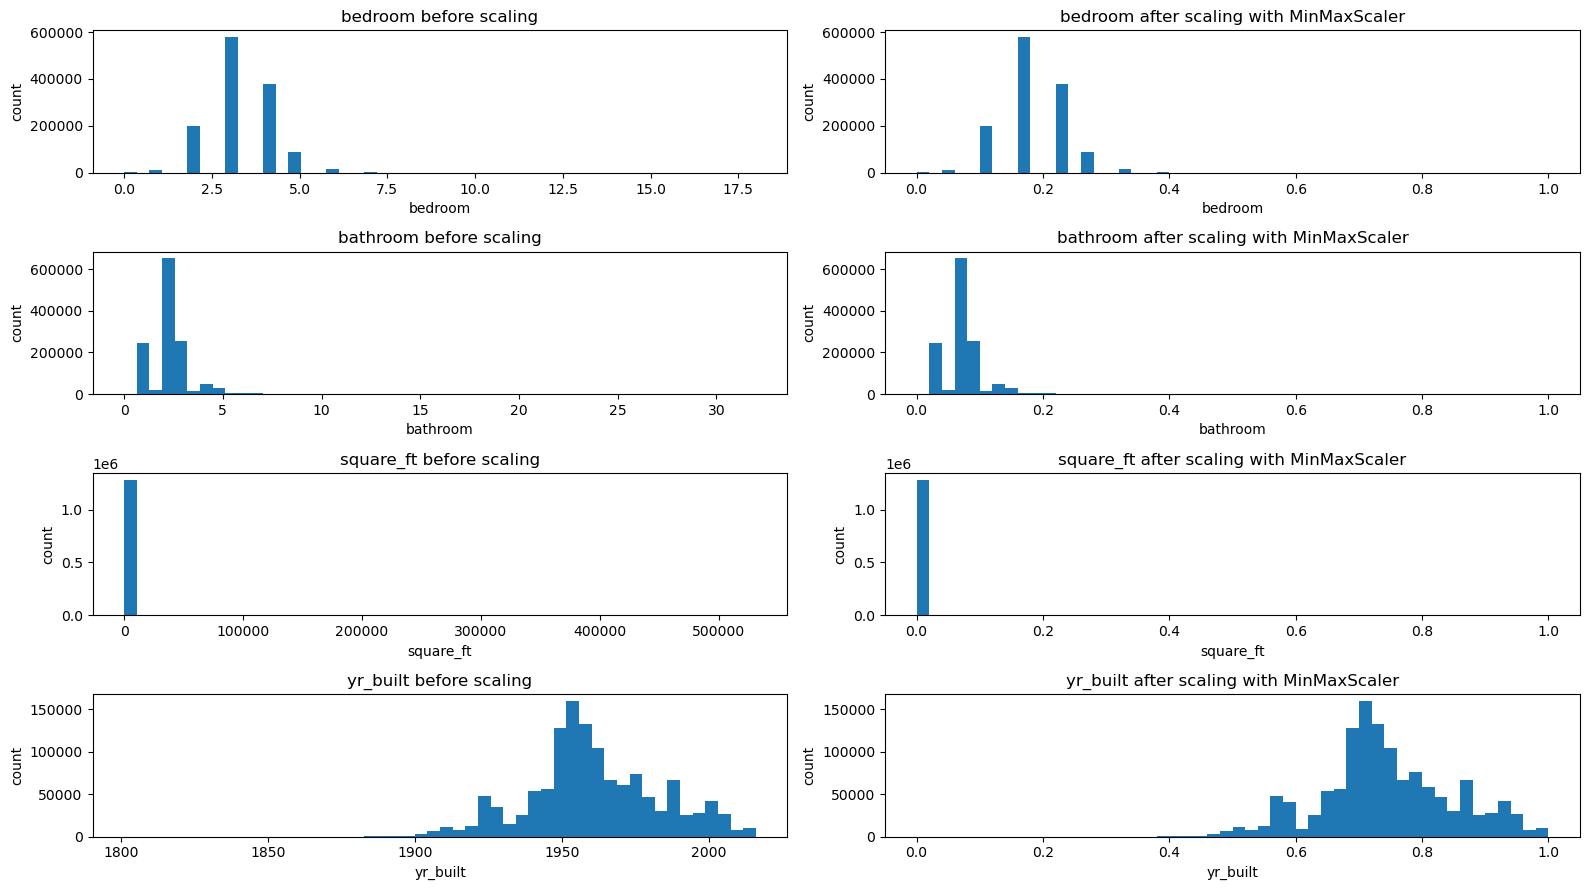

In [13]:
# selecting columns to scale
# using function to visualize non-scaled and scaled columns with MinMaxScaler
columns = ['bedroom', 'bathroom', 'square_ft', 'yr_built']
regression_function.visualize_scaler(scaler=MinMaxScaler(), df=train_encoded, 
                                     columns_to_scale=columns, bins=50)

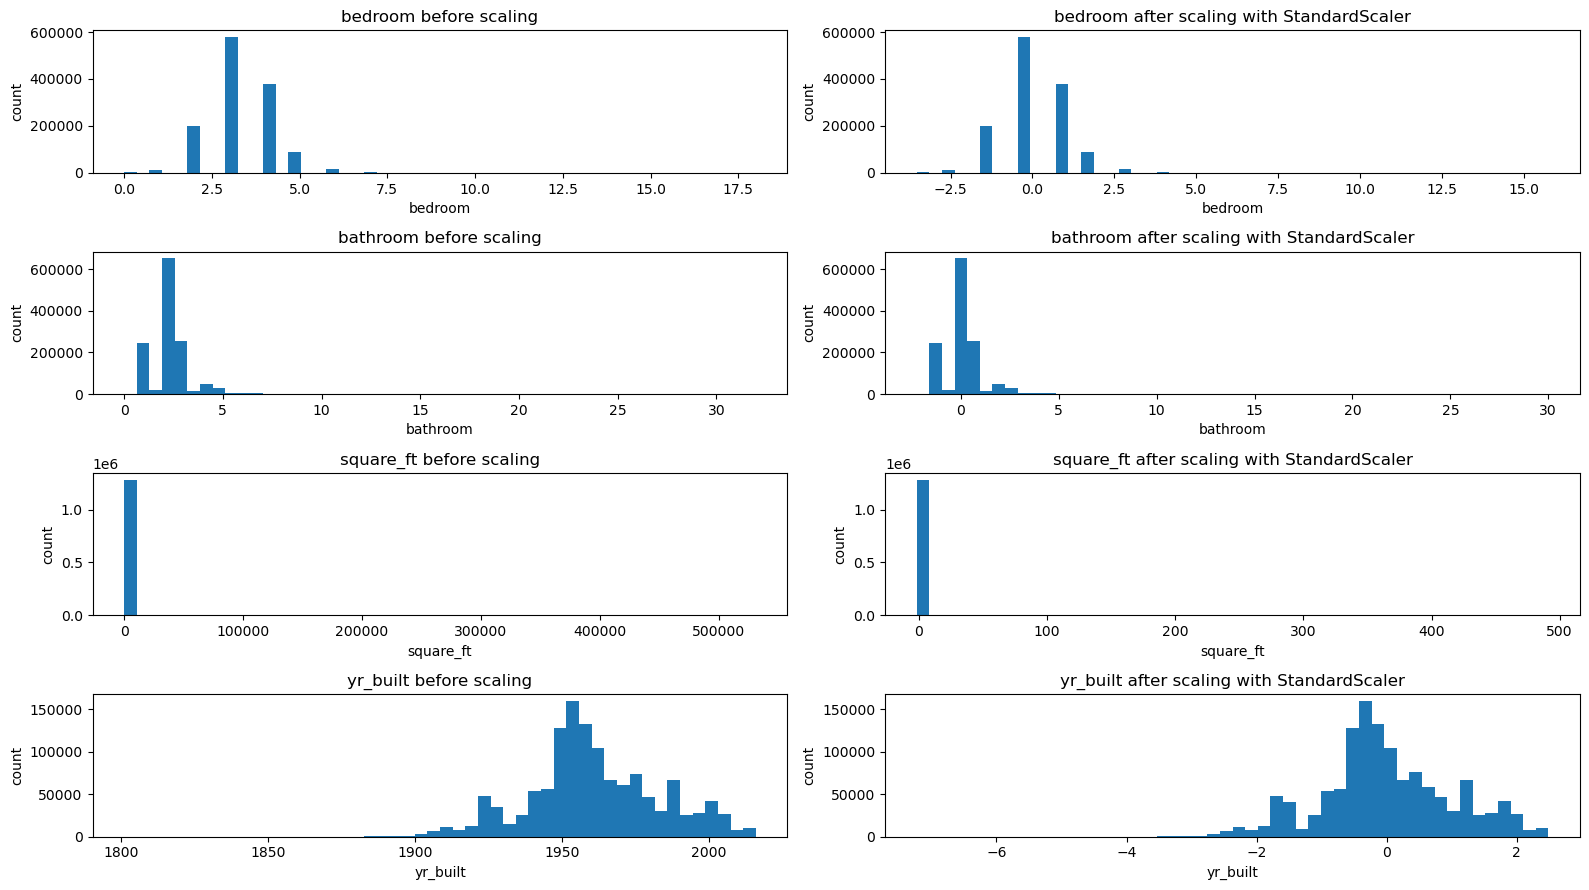

In [14]:
# using function to visualize non-scaled and scaled columns with StandardScaler
regression_function.visualize_scaler(scaler=StandardScaler(), df=train_encoded, 
                                     columns_to_scale=columns, bins=50)

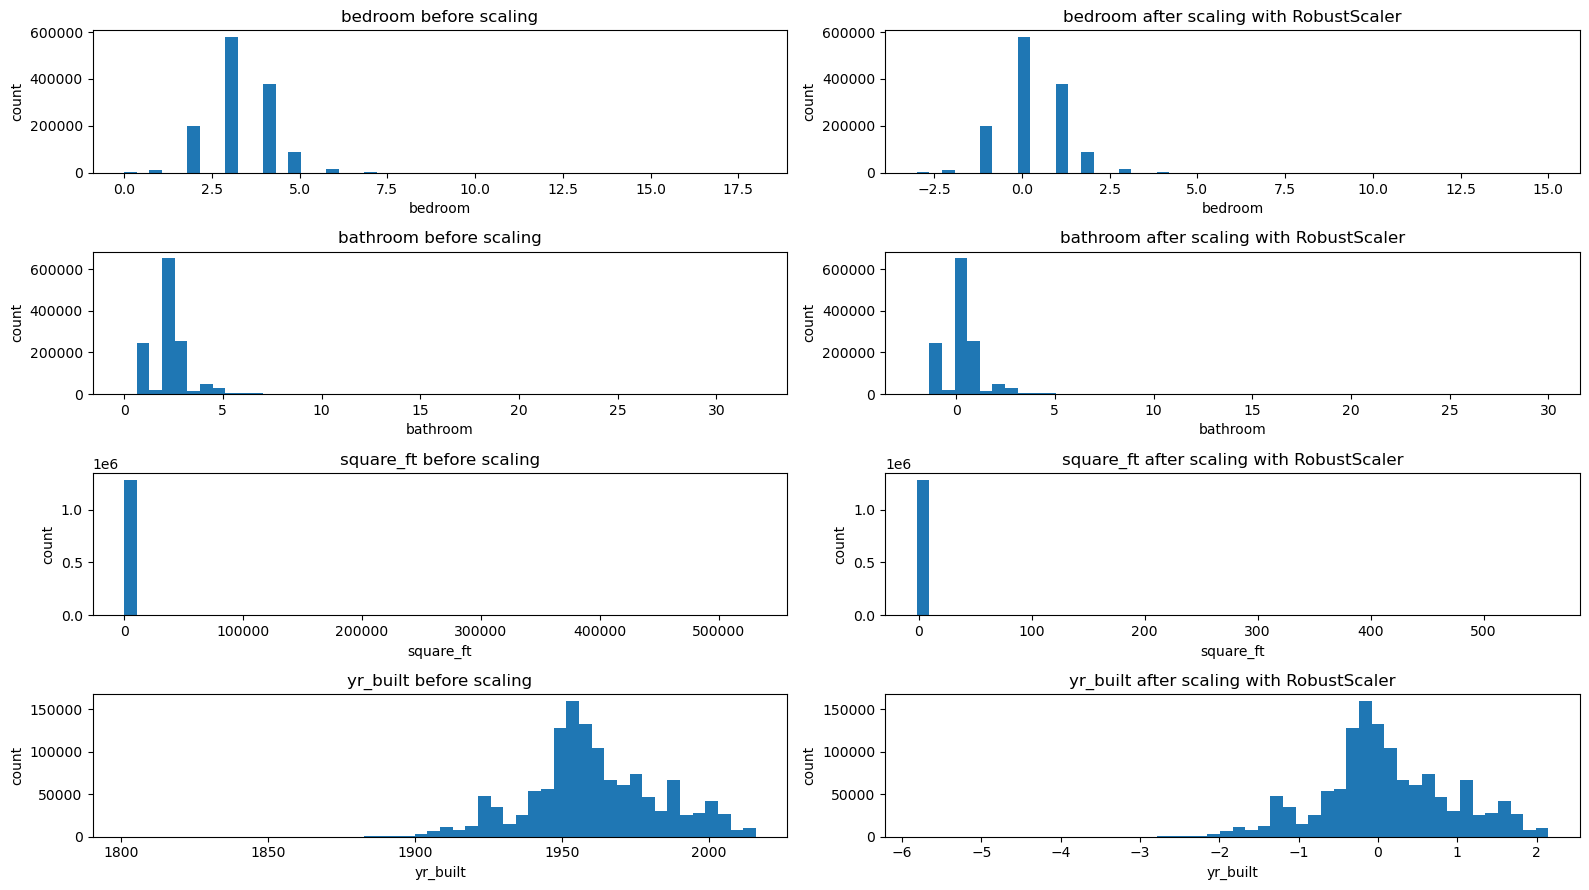

In [15]:
# using function to visualize non-scaled and scaled columns with RobustScaler
regression_function.visualize_scaler(scaler=RobustScaler(), df=train_encoded, 
                                     columns_to_scale=columns, bins=50)

In [16]:
# using function to scale datasets using RobustScaler after encoding datasets
train_encoded_robust, validate_encoded_robust, test_encoded_robust = regression_function.scaled_version(
                                        train_encoded, validate_encoded, test_encoded, scaler=RobustScaler(), 
                                        columns_to_scale=columns)

In [17]:
# looking at test dataset after using RobustScaler and encoded
test_encoded_robust.head()

,bedroom,bathroom,square_ft,property_value,yr_built,tax,county_Orange,county_Ventura
1656157,1.0,0.0,0.283158,114668.0,0.037037,1565.30,1,0
1948549,-1.0,-1.0,-0.223158,75656.0,-0.296296,876.98,0,1
1691317,0.0,0.0,-0.449474,406000.0,-0.185185,10431.05,0,0
1618983,1.0,1.0,0.784211,1441578.0,-0.814815,16525.72,0,0
1199756,1.0,3.0,1.956842,1277065.0,0.259259,14567.56,0,0


In [18]:
# establishing target variable
target = 'property_value'

In [19]:
# using a function to apply robust scaler and split target variable 
X_train, y_train, X_validate, y_validate, X_test, y_test = function.split_target(train_encoded_robust, 
                                                         validate_encoded_robust, test_encoded_robust, target)

In [20]:
# looking at train dataset after removing target variable
X_train.head(3)

,bedroom,bathroom,square_ft,yr_built,tax,county_Orange,county_Ventura
462820,2.0,2.0,1.461053,1.740741,7561.14,0,1
3880,0.0,0.0,0.062105,0.111111,7086.19,0,0
992263,1.0,0.0,-0.200000,-0.148148,1134.83,0,0


In [21]:
# looking at y_train with only target variable
y_train.head(3)

,property_value
462820,710674.0
3880,603333.0
992263,82804.0


In [22]:
# using a function to check on the split target
function.check_columns(X_validate)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
0,bedroom,17,"[2.0, 1.0, 0.0, -2.0, -1.0, 3.0, -3.0, 6.0, 4.0, 5.0, 7.0, 8.0, 15.0, 12.0, 10.0, 13.0...",0,0.0,float64
1,bathroom,31,"[2.0, 1.0, 0.0, -0.5, -1.0, 0.5, -2.0, 1.5, 2.5, 3.5, 3.0, 4.0, 5.0, 6.0, 5.5, 4.5, 7....",0,0.0,float64
2,square_ft,7496,"[2.3926315789473684, 0.3568421052631579, 0.3968421052631579, -0.08105263157894736, -0....",0,0.0,float64
3,yr_built,139,"[-1.2592592592592593, 0.037037037037037035, 0.3333333333333333, 1.1481481481481481, -0...",0,0.0,float64
4,tax,336695,"[33112.84, 4774.05, 8734.68, 2798.54, 932.4, 2740.59, 2998.72, 6959.52, 6610.02, 6584....",0,0.0,float64
5,county_Orange,2,"[0, 1]",0,0.0,int64
6,county_Ventura,2,"[0, 1]",0,0.0,int64


> ### Baseline and Median

In [23]:
# taking the baseline and save it to a variable
pred_mean = y_train.mean()[0]
pred_mean

460846.25053635077

In [24]:
# taking the median 
pred_median = y_train.median()[0]
pred_median

328400.0

In [25]:
# taking the baseline and save it to a variable
pred_mean = y_train.mean()[0]
# taking the median 
pred_median = y_train.median()[0]

# assigning the baseline in a new column to y_train and y_validate
y_train = y_train.assign(pred_mean=pred_mean)
y_validate = y_validate.assign(pred_mean=pred_mean)

# assigning the median in a new column to y_train and y_validate
y_train = y_train.assign(pred_median=pred_median)
y_validate = y_validate.assign(pred_median=pred_median)

# finding out the rmse for the mean value from y_train and y_validate
rmse_baseline_train = mean_squared_error(y_train.property_value, y_train.pred_mean) ** .5
rmse_baseline_validate = mean_squared_error(y_validate.property_value, y_validate.pred_mean) ** .5

# finding out the r2 for the mean value from y_train and y_validate
r2_baseline_train = r2_score(y_train.property_value, y_train.pred_mean)
r2_baseline_validate = r2_score(y_validate.property_value, y_validate.pred_mean)

# printing the rmse values for the baseline mean 
print(f'Mean Model')
print(f'RMSE Train: {rmse_baseline_train} \nRMSE validate: {rmse_baseline_validate}\n')

# creating a dictionary for rmse and r2 from the baseline
metrics_info = {
                'Model':'baseline_mean',
                'RMSE_train':rmse_baseline_train,
                'RMSE_validate':rmse_baseline_validate,
                'r2_train':r2_baseline_train,
                'r2_validate':r2_baseline_validate
                }
metrics_list = [metrics_info]

# finding out the rmse for the median from y_train and y_validate
rmse_mean_train = mean_squared_error(y_train.property_value, y_train.pred_median) ** .5
rmse_mean_validate = mean_squared_error(y_validate.property_value, y_validate.pred_median) ** .5

# finding out the r2 for the median from y_train and y_validate
r2_median_train = r2_score(y_train.property_value, y_train.pred_median)
r2_median_validate = r2_score(y_validate.property_value, y_validate.pred_median)

# printing the r2 values for the baseline median
print(f'Median Model')
print(f'RMSE Train: {rmse_baseline_train} \nRMSE validate: {rmse_baseline_validate}')

# adding the rmse and r2 from median to the dictionary
metrics_info = {
                'Model':'baseline_median',
                'RMSE_train':rmse_mean_train,
                'RMSE_validate':rmse_mean_validate,
                'r2_train':r2_median_train,
                'r2_validate':r2_median_validate
                }
metrics_list.append(metrics_info)

Mean Model
RMSE Train: 688054.7194082882 
RMSE validate: 662210.5845311697

Median Model
RMSE Train: 688054.7194082882 
RMSE validate: 662210.5845311697


> ### Linear Regression 

In [28]:
# creating the model
lr = LinearRegression()

# fit the model 
lr.fit(X_train, y_train.property_value)

# trying to predict and assigning the values to y_train and y_validate
y_train = y_train.assign(pred_LinearRegression=lr.predict(X_train))
y_validate = y_validate.assign(pred_LinearRegression=lr.predict(X_validate))

# taking the rmse 
rmse_mean_train = mean_squared_error(y_train.property_value, y_train.pred_LinearRegression) ** .5
rmse_mean_validate = mean_squared_error(y_validate.property_value, y_validate.pred_LinearRegression) ** .5

# taking the r2
r2_median_train = r2_score(y_train.property_value, y_train.pred_LinearRegression)
r2_median_validate = r2_score(y_validate.property_value, y_validate.pred_LinearRegression)

# printing the rmse values for LinearRegression
print(f'LinearRegression Model')
print(f'RMSE Train: {rmse_baseline_train} \nRMSE validate: {rmse_baseline_validate}')

# adding the rmse and r2 information of LinearRegression to the dictionary
metrics_info = {
                'Model':'LinearRegression',
                'RMSE_train':rmse_mean_train,
                'RMSE_validate':rmse_mean_validate,
                'r2_train':r2_median_train,
                'r2_validate':r2_median_validate
                }
metrics_list.append(metrics_info)

LinearRegression Model
RMSE Train: 688054.7194082882 
RMSE validate: 662210.5845311697


In [29]:
def evaluate_pred(y, yhat):
    '''
    This function will take target variable and the target prediction
    Example of y: y_train[['property_value']]
    Example of yhat: lr = LinearRegression()
                    lr.predict(X_train)
    
    Input: y, yhat
    Output: rmse, r2
    '''
    
    rmse = mean_squared_error(y, yhat, squared=False) ** .5
    r2 = r2_score(y, yhat) 
    
    print(f'RMSE: {rmse}\n r2: {r2}')
    
    return rmse, r2

In [30]:
rmse, r2 = evaluate_pred(y_train.property_value, lr.predict(X_train))

RMSE: 297.9364416131964
 r2: 0.9833563509412161


> ### LassoLars

In [31]:
# creating the model
ll = LassoLars(alpha=1, normalize=False)

# fit the model
ll.fit(X_train, y_train.property_value)

# trying to predict and assigning the values to y_train and y_validate
y_train = y_train.assign(pred_LassoLars=ll.predict(X_train))
y_validate = y_validate.assign(pred_LassoLars=ll.predict(X_validate))

# taking the rmse
rmse_mean_train = mean_squared_error(y_train.property_value, y_train.pred_LassoLars) ** .5
rmse_mean_validate = mean_squared_error(y_validate.property_value, y_validate.pred_LassoLars) ** .5

# taking the r2
r2_median_train = r2_score(y_train.property_value, y_train.pred_LassoLars)
r2_median_validate = r2_score(y_validate.property_value, y_validate.pred_LassoLars)

# printing the rmse values for LassoLars
print(f'LassoLars Model')
print(f'RMSE Train: {rmse_mean_train} \nRMSE validate: {rmse_mean_validate}')

# adding the rmse and r2 information of LassoLars to the dictionary
metrics_info = {
                'Model':'LassoLars',
                'RMSE_train':rmse_mean_train,
                'RMSE_validate':rmse_mean_validate,
                'r2_train':r2_median_train,
                'r2_validate':r2_median_validate
                }
metrics_list.append(metrics_info)

LassoLars Model
RMSE Train: 88766.12349597157 
RMSE validate: 87911.19753078166


> ### PolynomialFeatures

In [32]:
# creating PolynomialFeatures model
pf = PolynomialFeatures(degree=2)

# fit the model
X_train_d2 = pf.fit_transform(X_train)
X_validate_d2 = pf.transform(X_validate)

# Create LinearRegression object
lp = LinearRegression()

# Fit the model to the training data
lp.fit(X_train_d2, y_train.property_value)

# Make predictions on the training and validation sets
y_train = y_train.assign(pred_PolynomialFeatures=lp.predict(X_train_d2))
y_validate = y_validate.assign(pred_PolynomialFeatures=lp.predict(X_validate_d2))

# Calculating RMSE for the model on both the training and validation sets
rmse_mean_train = mean_squared_error(y_train[['property_value']], y_train.pred_PolynomialFeatures) ** .5
rmse_mean_validate = mean_squared_error(y_validate[['property_value']], y_validate.pred_PolynomialFeatures) ** .5

# Calculating r2 score 
r2_median_train = r2_score(y_train[['property_value']], y_train.pred_PolynomialFeatures)
r2_median_validate = r2_score(y_validate[['property_value']], y_validate.pred_PolynomialFeatures)

# printing the rmse values for PolynomialFeatures
print(f'PolynomialFeatures Model')
print(f'RMSE Train: {rmse_mean_train} \nRMSE validate: {rmse_mean_validate}')

# adding the rmse and r2 information of PolynomialFeatures to the dictionary
metrics_info = {
                'Model':'PolynomialFeatures',
                'RMSE_train':rmse_mean_train,
                'RMSE_validate':rmse_mean_validate,
                'r2_train':r2_median_train,
                'r2_validate':r2_median_validate
                }
metrics_list.append(metrics_info)

PolynomialFeatures Model
RMSE Train: 85332.82650432199 
RMSE validate: 92613.12959092832


> ### TweediRegressor (GLM)

In [33]:
# creating the TweediRegressor model
tr = TweedieRegressor(alpha=1, power=0)

# fit the model
tr.fit(X_train, y_train.property_value)

# Make predictions on the training and validation sets
y_train = y_train.assign(pred_TweedieRegressor=tr.predict(X_train))
y_validate = y_validate.assign(pred_TweedieRegressor=tr.predict(X_validate))

# Calculating RMSE scores for the model on both the training and validation sets
rmse_mean_train = mean_squared_error(y_train.property_value, y_train.pred_TweedieRegressor) ** .5
rmse_mean_validate = mean_squared_error(y_validate.property_value, y_validate.pred_TweedieRegressor) ** .5

# Calculating r2 score for the model on training and validation sets
r2_median_train = r2_score(y_train.property_value, y_train.pred_TweedieRegressor)
r2_median_validate = r2_score(y_validate.property_value, y_validate.pred_TweedieRegressor)

# printing the rmse and r2 information of TweediRegressor 
print(f'TweedieRegressor Model')
print(f'RMSE Train: {rmse_mean_train} \nRMSE validate: {rmse_mean_validate}')

# adding the rmse and r2 information of TweedieRegressor to the dictionary
metrics_info = {
                'Model':'TweediRegressor',
                'RMSE_train':rmse_mean_train,
                'RMSE_validate':rmse_mean_validate,
                'r2_train':r2_median_train,
                'r2_validate':r2_median_validate
                }
metrics_list.append(metrics_info)

TweedieRegressor Model
RMSE Train: 90858.35955309555 
RMSE validate: 89858.0369316424


In [37]:
y_train.head()

,property_value,pred_mean,pred_median,pred_LinearRegression,pred_LassoLars,pred_PolynomialFeatures,pred_TweedieRegressor
462820,710674.0000,460846.2505,328400.0000,648422.7443,648413.3960,639496.7763,629399.6187
3880,603333.0000,460846.2505,328400.0000,569153.9273,569158.4013,575360.4980,584294.4695
992263,82804.0000,460846.2505,328400.0000,57664.4871,57670.7551,70925.3807,74131.4070
311722,355444.0000,460846.2505,328400.0000,358133.6030,358122.8798,344768.3907,336401.5376
787985,571000.0000,460846.2505,328400.0000,569509.8530,569517.7634,576149.7104,587910.3758


In [35]:
# making metrics_list into a df
metrics_df = pd.DataFrame(metrics_list)

In [36]:
# changing option for metrics_df into 4 decimal places
pd.options.display.float_format = '{:.4f}'.format
metrics_df

,Model,RMSE_train,RMSE_validate,r2_train,r2_validate
0,baseline_mean,688054.7194,662210.5845,0.0000,-0.0000
1,baseline_median,700686.3108,675439.8151,-0.0371,-0.0404
2,LinearRegression,88766.1232,87911.2916,0.9834,0.9824
3,LassoLars,88766.1235,87911.1975,0.9834,0.9824
4,PolynomialFeatures,85332.8265,92613.1296,0.9846,0.9804
5,TweediRegressor,90858.3596,89858.0369,0.9826,0.9816


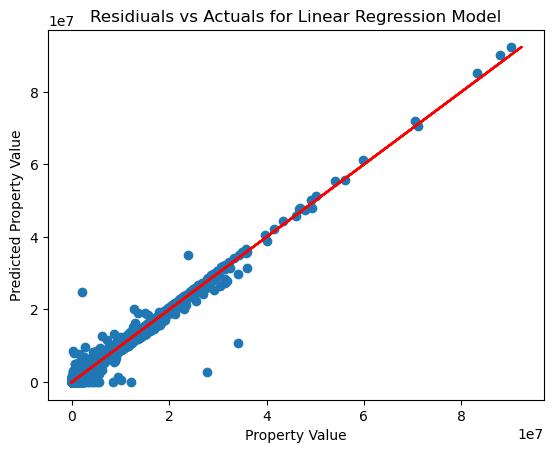

In [38]:
# visualize the property value against the predicted property value using LinearRegression model
plt.scatter(y_train.property_value, y_train.pred_LinearRegression)
plt.title('Residiuals vs Actuals for Linear Regression Model')
plt.plot(y_train, y_train, ls='-', c='r')
plt.xlabel('Property Value')
plt.ylabel('Predicted Property Value')
plt.show();

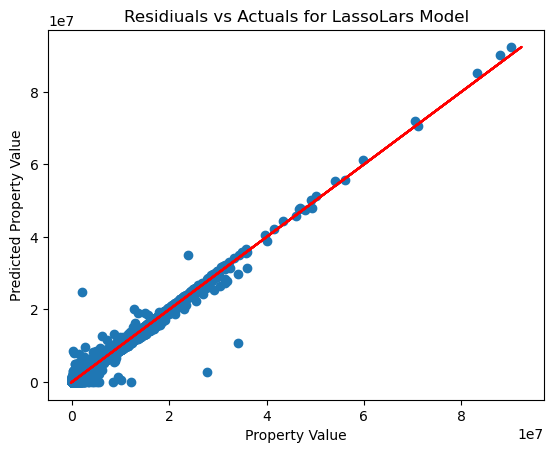

In [39]:
# visualize the property value against the predicted property value using LassoLars model
plt.scatter(y_train.property_value, y_train.pred_LassoLars)
plt.title('Residiuals vs Actuals for LassoLars Model')
plt.plot(y_train, y_train, ls='-', c='r')
plt.xlabel('Property Value')
plt.ylabel('Predicted Property Value')
plt.show();

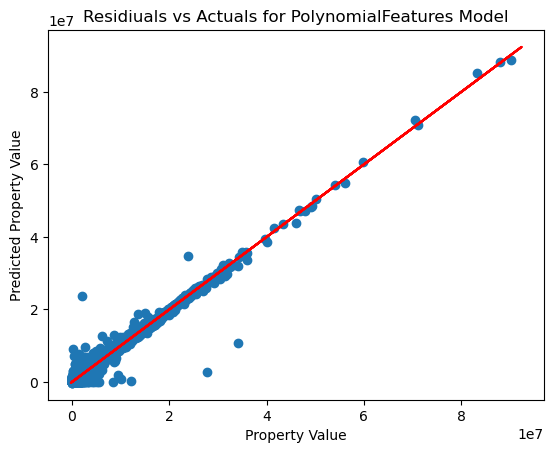

In [41]:
# visualize the property value against the predicted property value using PoloynomialFeatures model
plt.scatter(y_train.property_value, y_train.pred_PolynomialFeatures)
plt.title('Residiuals vs Actuals for PolynomialFeatures Model')
plt.plot(y_train, y_train, ls='-', c='r')
plt.xlabel('Property Value')
plt.ylabel('Predicted Property Value')
plt.show();

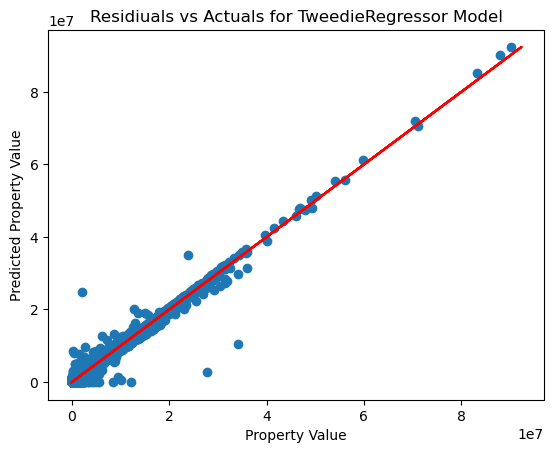

In [42]:
# visualize the property value against the predicted property value using TweedieRegressor model
plt.scatter(y_train.property_value, y_train.pred_TweedieRegressor)
plt.title('Residiuals vs Actuals for TweedieRegressor Model')
plt.plot(y_train, y_train, ls='-', c='r')
plt.xlabel('Property Value')
plt.ylabel('Predicted Property Value')
plt.show();

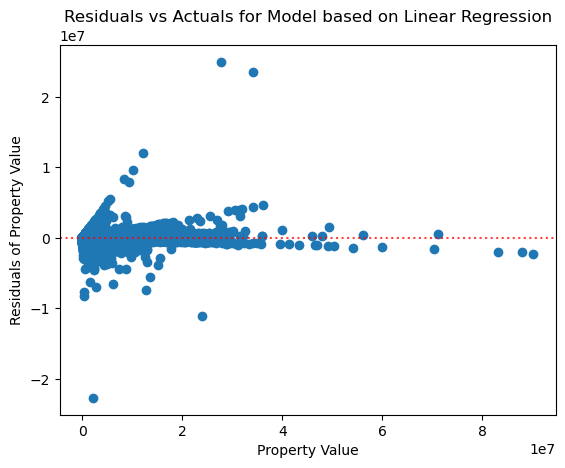

In [43]:
# visualize the property value against the predicted property value using LinearRegression model
plt.scatter(y_train.property_value, y_train.property_value - y_train.pred_LinearRegression)
plt.title('Residuals vs Actuals for Model based on Linear Regression')
plt.axhline(0, ls=':', c='r', alpha=0.75)
plt.xlabel('Property Value')
plt.ylabel('Residuals of Property Value')
plt.show();

In [44]:
y_train.head()

,property_value,pred_mean,pred_median,pred_LinearRegression,pred_LassoLars,pred_PolynomialFeatures,pred_TweedieRegressor
462820,710674.0000,460846.2505,328400.0000,648422.7443,648413.3960,639496.7763,629399.6187
3880,603333.0000,460846.2505,328400.0000,569153.9273,569158.4013,575360.4980,584294.4695
992263,82804.0000,460846.2505,328400.0000,57664.4871,57670.7551,70925.3807,74131.4070
311722,355444.0000,460846.2505,328400.0000,358133.6030,358122.8798,344768.3907,336401.5376
787985,571000.0000,460846.2505,328400.0000,569509.8530,569517.7634,576149.7104,587910.3758


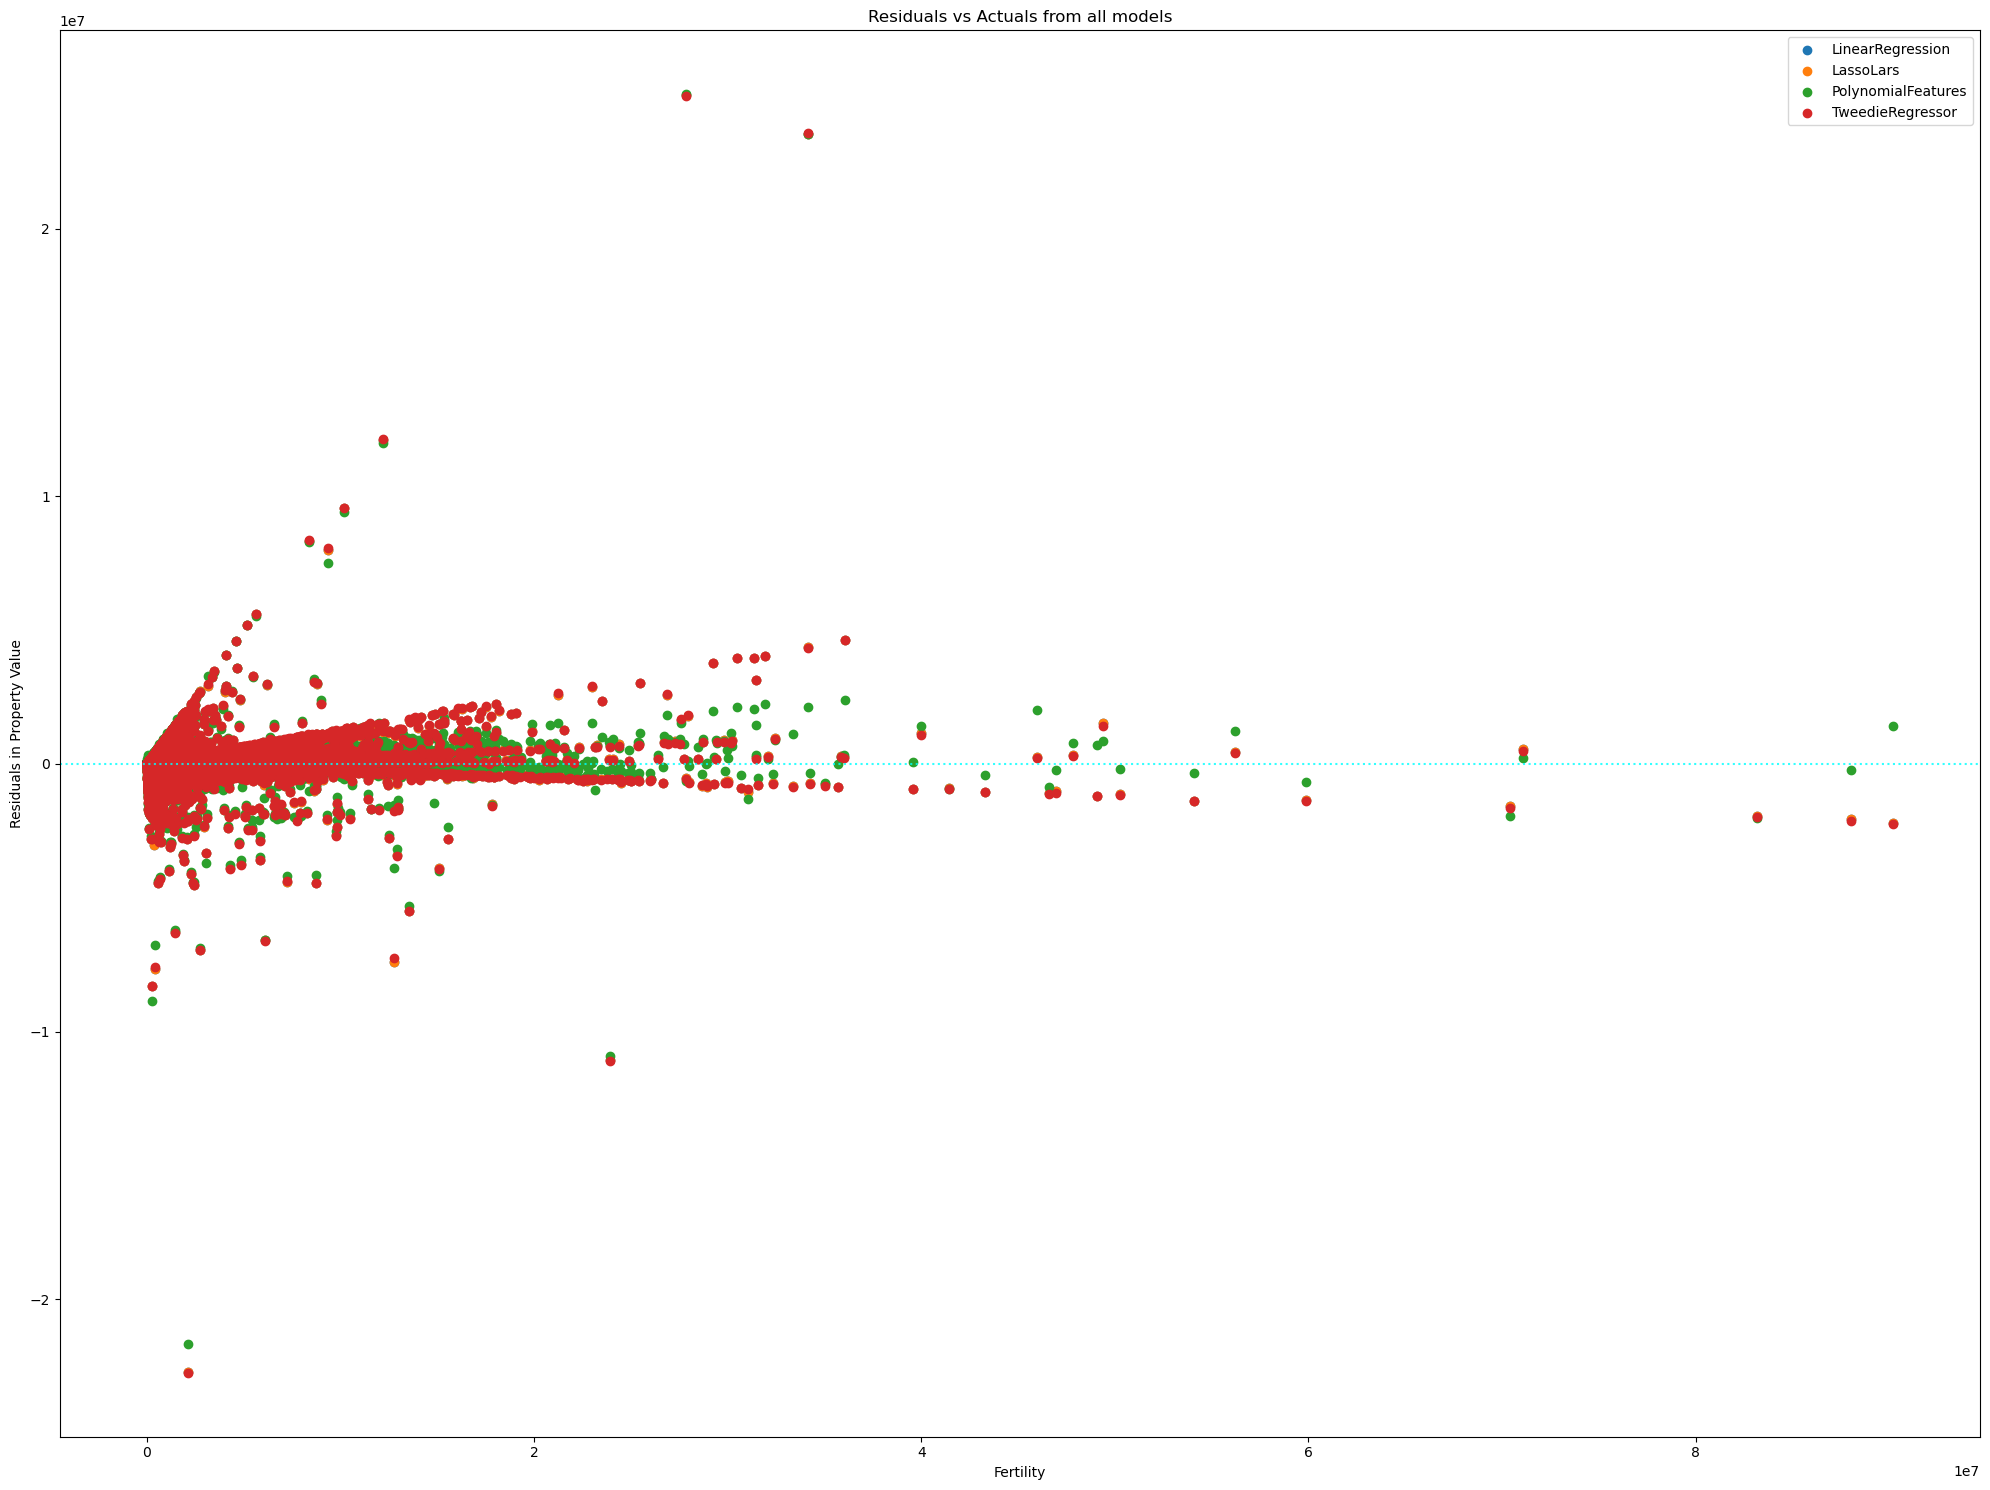

In [48]:
# visualize all models with property value against residuals of predicted property value
plt.figure(figsize=(20, 15))
plt.scatter(y_train.property_value, y_train.property_value - y_train.pred_LinearRegression, 
                                                        label='LinearRegression')
plt.scatter(y_train.property_value, y_train.property_value - y_train.pred_LassoLars, 
                                                        label='LassoLars')
plt.scatter(y_train.property_value, y_train.property_value - y_train.pred_PolynomialFeatures, 
                                                        label='PolynomialFeatures')
plt.scatter(y_train.property_value, y_train.property_value - y_train.pred_TweedieRegressor, 
                                                        label='TweedieRegressor')

plt.title('Residuals vs Actuals from all models')
plt.axhline(0, ls=':', c='cyan', alpha=0.8)
plt.xlabel('Fertility')
plt.ylabel('Residuals in Property Value')
plt.legend()
plt.tight_layout()
plt.show();

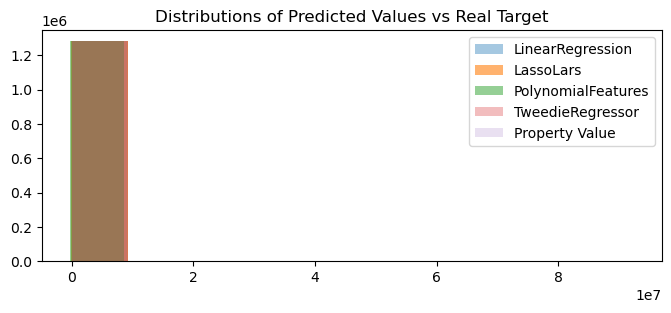

In [85]:
# visual of all models on predicted values against real target
plt.figure(figsize=(8,3))
plt.hist(y_train.pred_LinearRegression, alpha=0.4, label='LinearRegression')
plt.hist(y_train.pred_LassoLars, alpha=0.6, label='LassoLars')
plt.hist(y_train.pred_PoloynomialFeatures, alpha=0.5, label='PolynomialFeatures')
plt.hist(y_train.pred_TweedieRegressor, alpha=0.3, label='TweedieRegressor')
plt.hist(y_train.property_value, alpha=0.2, label='Property Value')
plt.legend()
plt.title('Distributions of Predicted Values vs Real Target')
plt.show();